In [18]:
import chess
import chess.engine
import random

engine_path = r"C:\Users\yassi\OneDrive\Desktop\chess arm - Copy\stockfish\stockfish-windows-x86-64-avx2.exe"
engine = chess.engine.SimpleEngine.popen_uci(engine_path)

In [19]:
import chess

def detect_pin_action(board, move):
    to_square = move.to_square
    piece = board.piece_at(to_square)

    if piece is None:
        return "No piece moved."

    # Pins can only be caused by rooks, bishops, or queens
    if piece.piece_type not in [chess.ROOK, chess.BISHOP, chess.QUEEN]:
        return "The moved piece cannot cause a pin."

    # Define directional offsets for each piece type
    directions = {
        chess.ROOK: [(0, 1), (1, 0), (0, -1), (-1, 0)],  # Horizontal & vertical
        chess.BISHOP: [(1, 1), (1, -1), (-1, 1), (-1, -1)],  # Diagonals
        chess.QUEEN: [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)],  # Both
    }

    board_size = 8  # Chessboard is 8x8

    def square_in_bounds(file, rank):
        return 0 <= file < board_size and 0 <= rank < board_size

    # Convert square index to file and rank
    from_file, from_rank = chess.square_file(to_square), chess.square_rank(to_square)

    for offset_file, offset_rank in directions[piece.piece_type]:
        pinned_piece = None
        blocking_piece = None

        file, rank = from_file + offset_file, from_rank + offset_rank

        while square_in_bounds(file, rank):
            current_square = chess.square(file, rank)
            target = board.piece_at(current_square)

            if target:
                if target.color == piece.color:
                    break  # Friendly piece blocks the pin
                elif pinned_piece is None:
                    pinned_piece = current_square  # First enemy piece might be pinned
                else:
                    blocking_piece = current_square
                    break  # Second enemy piece blocks the pin
            file += offset_file
            rank += offset_rank

        # If the pinned piece shields the king, it's a valid pin
        if pinned_piece and blocking_piece:
            pinned_piece_obj = board.piece_at(pinned_piece)
            blocking_piece_obj = board.piece_at(blocking_piece)
            if blocking_piece_obj and blocking_piece_obj.piece_type == chess.KING:
                return f"Your {piece.symbol()} has pinned the {pinned_piece_obj.symbol()} to the King."

    return "No pin detected."


In [20]:

def detect_fork(board, move):
    # Get the destination square and the piece moved
    to_square = move.to_square
    piece = board.piece_at(to_square)

    if piece is None:
        return "No piece moved."

    # Check if the piece attacks two or more opponent pieces
    attacked_squares = board.attacks(to_square)
    attacked_pieces = [
        target for target in attacked_squares
        if board.piece_at(target) and board.piece_at(target).color != piece.color
    ]
    # Filter out only the valuable pieces
    valuable_pieces = [target for target in attacked_pieces if board.piece_at(target).piece_type in [chess.ROOK,chess.KNIGHT,chess.BISHOP, chess.QUEEN, chess.KING]]

    if len(valuable_pieces) < 2:
        return "No fork detected."

    # Ensure the piece cannot be captured
    if board.is_attacked_by(not piece.color, to_square):
        return "The moved piece can be captured."

    # Generate explanation
    attacked_pieces_names = [str(board.piece_at(target)) for target in valuable_pieces]
    return f"Your {piece.symbol()} forked the {' and '.join(attacked_pieces_names)}, and it cannot be captured."

*board with moves*


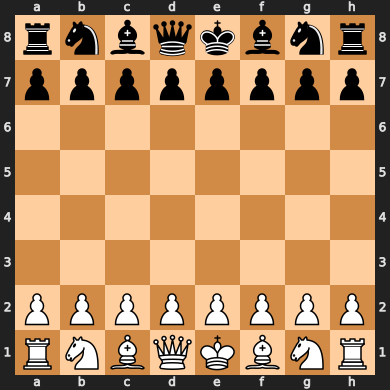

In [21]:
chess.Board("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR")

desimprovement
-2.08


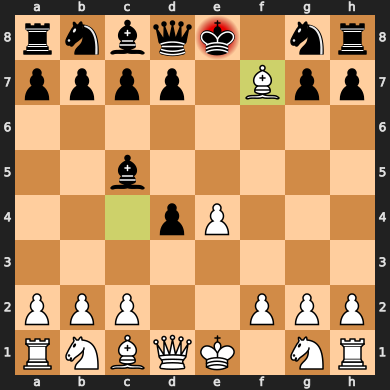

In [22]:
board=chess.Board()
fen_before=board.fen()
moves_test_fork = ["e2e4", "e7e5", "f1c4","f8c5","d2d4","e5d4","c4f7"]#"f2f3", "e7e5", "g2g4",d8h4
moves_test_pin=["e2e4", "e7e5", "g1f3","d7d5","d2d4","b8c6","f1b5"]
moves=[chess.Move.from_uci(move) for move in moves_test_fork]
for move in moves :
    fen_before=board.fen()
    board.push(move)
fen_after=board.fen()

board_before=chess.Board(fen_before)
analysis_before = engine.analyse(board_before, chess.engine.Limit(time=0.1))
before_eval = analysis_before['score'].relative.score()/100

board_after = chess.Board(board.fen())
analysis_after = engine.analyse(board_after, chess.engine.Limit(time=0.1))
after_eval = analysis_after['score'].relative.score()/100
    
    # Compare evaluations
difference = after_eval - before_eval
if difference>0 and board_before.turn or difference<0 and not board_before.turn  :
    explanation="improvmenet"
else :
    explanation="desimprovement"
print(explanation)
print(difference)
board


In [23]:
# for square in chess.SQUARES:
#     piece = board.piece_at(square)
#     print(piece)
print(move)
result = detect_fork(board, move)
result2=detect_pin_action(board,move)
print(result2)

c4f7
No pin detected.


Generated Move: e2e4
a1


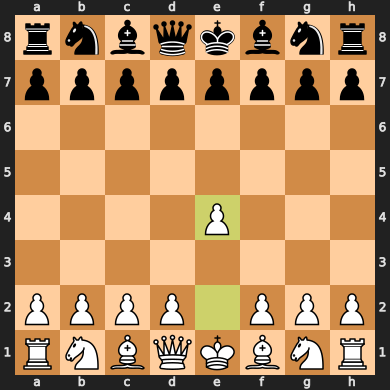

In [24]:
board = chess.Board()  # Start from the standard chess initial position
move = chess.Move.from_uci("e2e4")
print("Generated Move:", move)

board.push(move)
print(chess.square_name(0))
board    


In [25]:
board = chess.Board()
moves = ["e2e4", "e7e5", "f1c4", "f8c5", "d2d4", "e5d4","c4f7"]#b8c6/e5d4  c4f7
# Evaluate the initial position before any moves
initial_eval = engine.analyse(board, chess.engine.Limit(depth=20))["score"].relative.score()
formatted_initial_eval = initial_eval  # Convert to standard format
print(f"Initial evaluation: {formatted_initial_eval:+.2f}")

# Apply moves and evaluate after each move
for i, move_str in enumerate(moves):
    move = chess.Move.from_uci(move_str)  # Convert string to chess.Move
    board.push(move)  # Make the move on the board
    result_eval = engine.analyse(board, chess.engine.Limit(depth=20))["score"].relative.score()
    formatted_eval = result_eval  # Convert centipawns to standard evaluation
    print(f"Move {i+1}: {move_str} -> Evaluation: {formatted_eval:+.2f}")

#if move==best_move_to_play and board_after.is_capture(move) and  initial_piece in [chess.QUEEN, chess.ROOK, chess.BISHOP, chess.KNIGHT] :

Initial evaluation: +32.00
Move 1: e2e4 -> Evaluation: -25.00
Move 2: e7e5 -> Evaluation: +26.00
Move 3: f1c4 -> Evaluation: +0.00
Move 4: f8c5 -> Evaluation: +16.00
Move 5: d2d4 -> Evaluation: -8.00
Move 6: e5d4 -> Evaluation: +113.00
Move 7: c4f7 -> Evaluation: -116.00


e2e4
Move e2e4 is NOT a brilliant move.
e7e5
Move e7e5 is NOT a brilliant move.
g1f3
Move g1f3 is NOT a brilliant move.
b8c6
Move f7f6 is NOT a brilliant move.
f3e5
Move f3e5 is NOT a brilliant move.


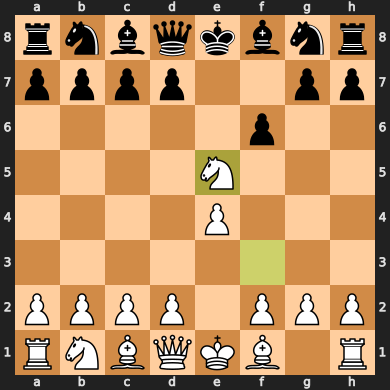

In [26]:
import chess
import chess.engine


# Function to determine if a move is brilliant
def is_brilliant_move(board, move):

    # Get the optimal move suggested by the engine
    analysis = engine.analyse(board, chess.engine.Limit(depth=20))
    best_move = analysis["pv"][0]  # Best move predicted by the engine
    print(best_move)
    engine_eval = analysis["score"].relative.score()
    
    # Check if the given move is the best move
    if move != best_move:
        return False  # Not optimal
    
    # Detect a piece sacrifice by comparing captured piece values
    captured_piece_value = 0
    if board.is_capture(move):  # Check if the move captures a piece
        captured_piece = board.piece_at(move.to_square)
        if captured_piece:
            captured_piece_value = captured_piece.piece_type  # Map piece type to value
            # Map piece type to standard chess values
            piece_values = {
                chess.PAWN: 1,
                chess.KNIGHT: 3,
                chess.BISHOP: 3,
                chess.ROOK: 5,
                chess.QUEEN: 9,
                chess.KING: 0  # King has no material value
            }
            captured_piece_value = piece_values.get(captured_piece_value, 0)
    
    # If the captured piece value is significant, classify it as a sacrifice
    if captured_piece_value >= 5:  # Sacrifices could involve at least a rook/queen
        return True

    return False


# Example usage:
board = chess.Board()

# Example moves
moves = [
    "e2e4",  # 1. e4
    "e7e6",  # 1... e6
    "d2d4",  # 2. d4
    "d7d5",  # 2... d5
    "b1c3",  # 3. c3
    "g8f6",  # 3... f6
    "e4e5",    # 4. e5
    "f6d7",  # 4... fd7
    "f2f4",    # 5. f4
    "c7c5",    # 5... c5
    "g1f3",  # 6. f3
    "b8c6",  # 6... c6
    "c1e3",  # 7. e3
    "d8b6",  # 7... b6
    "c3a4",  # 8. a4
    "b6a5",   # 8... a5+
    "c2c3",  # 9. c3
    "c5d4",  # 9... cxd4
    "b2b4",  # 10. b4
    "c6b4"    # 10... xb4
]

moves=["e2e4","e7e5","g1f3","f7f6","f3e5"]

for move_str in moves:
    move = chess.Move.from_uci(move_str)
    if is_brilliant_move(board, move):
        print(f"Move {move} is a brilliant move!")
    else:
        print(f"Move {move} is NOT a brilliant move.")
    board.push(move)
board


In [29]:


# Set up the initial position and apply moves
board = chess.Board()
moves = ["e2e4", "e7e5", "g1f3", "f7f6", "f3e5"]
for move in moves:
    board.push_uci(move)

# Evaluate the final position
result = engine.analyse(board, chess.engine.Limit(time=0.5))  # Analyze for 2 seconds
print("Evaluation:", result["score"])

# Check if it's a brilliant move
if result["score"].relative.score() > 50:  # Arbitrary brilliance threshold; adjust as needed
    print("The last move is a brilliant move!")
else:
    print("The last move is not a brilliant move.")



Evaluation: -201
The last move is not a brilliant move.


In [3]:
def add(a):
    a[1] += 1  # Modify the first element of the list

a = [2,5]  # 'a' is a list containing one integer
add(a)
print(a[1])  # Output: 3


6
